#### Quick visualization of reservoir neurons activity

We use a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system and try to predict future steps of the chaotic time series.
Then we plot some randomly picked neurons from the reservoir.

In [1]:
import numpy as np

from echoes.esn import EchoStateNetwork
from echoes.datasets import load_mackeyglasst17
from echoes.plotting import set_mystyle, plot_reservoir_activity, plot_predicted_ts

set_mystyle()  # just aesthetics

In [2]:
# Load data and define train/test length
data = load_mackeyglasst17().reshape(-1, 1)
trainlen, testlen = 2000, 2000
totallen = trainlen + testlen

# Instantiate model
esn = EchoStateNetwork(
    n_inputs=1,
    n_outputs=1,
    n_reservoir=200,
    spectral_radius=1.25,   
    teacher_forcing=True,
    leak_rate=.4,
    regression_params={
        "method": "pinv"  
    },
    store_states_pred=True,   # store states for plotting
    random_seed=42,    
).fit(None, data[: trainlen])  # fit the model 

prediction = esn.predict(None, mode="generative", n_steps=testlen)

training RMSE: 6.982918235222812e-05


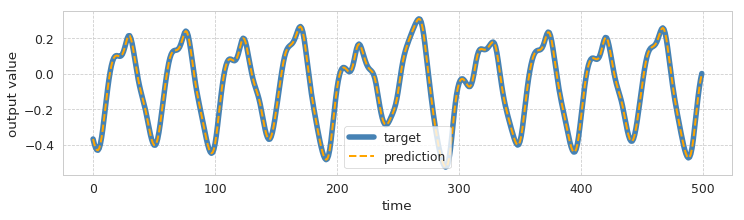

In [4]:
plot_predicted_ts(data[trainlen: totallen], prediction, 
                  end=500,
                  figsize=(12, 3))   

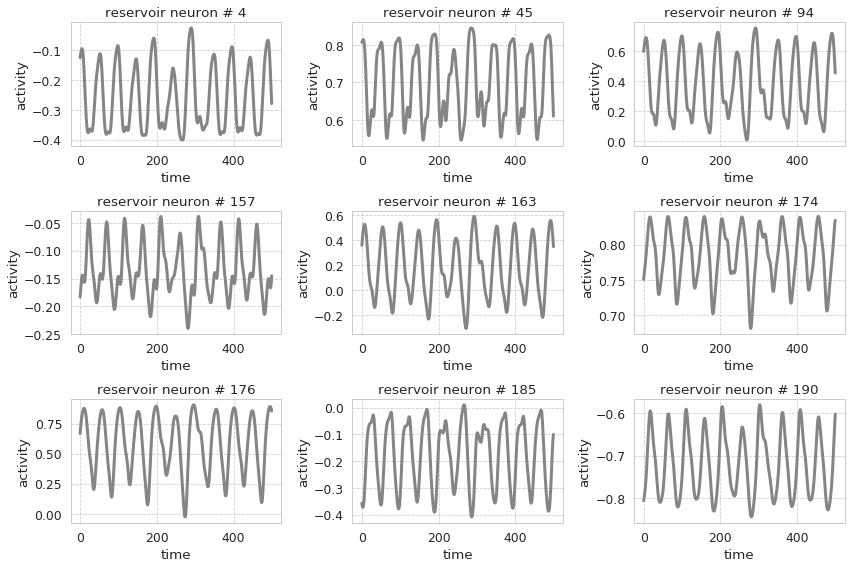

In [19]:
neurons_to_plot = sorted(np.random.randint(0, esn.n_reservoir, size=9))   # pick 9 neurons at random to plot

plot_reservoir_activity(esn,   
                        neurons_to_plot,
                        pred=True,   # plot activity during prediction
                        end=500,
                        figsize=(12, 8))